## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez TEAMS w wiadomości prywatnej.

## Regresja liniowa prosta

Regresja liniowa prosta, to szczególny przypadek regresji liniowej, w którym zmienną objaśnaną przewidujemy za pomocą jednej zmiennej objaśniającej. Zadanie będzie polegało na wyznaczeniu funkcji regresji opisującej zależność zarobków od lat doświadczenia. 

Zbiór danych do tego zadania, to Salary.csv. Znajduje się w katalogu datasets.
W zbiorze danych znajduje się 35 obserwacji. Każdy wpis jest osobną obserwacją. W zbiorze znajdują się 3 kolumny: YearsExperience, Age i Salary. W pierwszym zadaniu należy wykorzystać YearsExperience i Salary, pomijając Age.

### Imports

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

### Zadanie 1

Wczytaj dane z pliku Salary.csv, a następnie stwórz wykres przedstawiający obserwacje.

In [234]:
#YOUR CODE HERE
data = pd.read_csv('./Salary.csv', delimiter=',')
data.head()

,YearsExperience,Age,Salary
0,1.1,20,39343
1,1.3,21,46205
2,1.5,21,37731
3,2.0,22,43525
4,2.2,22,39891


In [235]:
data.describe()

,YearsExperience,Age,Salary
count,35.000000,35.000000,35.000000
mean,6.308571,28.371429,83888.428571
std,3.618610,5.568217,32200.112889
min,1.100000,20.000000,37731.000000
25%,3.450000,24.000000,57019.000000
50%,5.300000,27.000000,81363.000000
75%,9.250000,32.500000,113223.500000
max,13.500000,40.000000,139465.000000


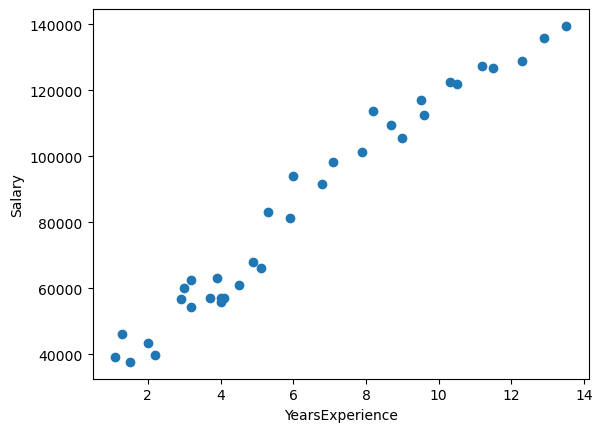

In [236]:
x = data['YearsExperience']
y = data['Salary']

plt.scatter(x, y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [237]:
x = x.values
y = y.values

### Zadanie 2

Implementacja algorytmu regresji liniowej prostej.

Żeby dobrze zrozumieć zapis matematyczny, który początkowo może sprawiać problemy, przejdziemy po kolei po elementach składowych algorytmu. Następnie złączymy elementy w całość.

Wzór na regresję liniową w naszym przypadku będzie wyglądał następująco:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 = \beta_{0} + \beta_{1}  YearsExperience
\end{equation}

Przypomnijmy, że zapis $x^{(i)}$ oznacza wektor dla $i$-tej obserwacji. W naszym przypadku ten wektor będzie zawierał tylko $1$ wartość dla cechy $YearsExperience$.


_Uwaga: W różnych źródłach algorytm regresji liniowej ma różne zapisy. Czasem podawane są wzory w postaci z sumą, czasem w postaci macierzowej. Jest to spowodowane tym, że algorytm można zaimplementować na te dwa sposoby. Łatwiejszym i bardziej intuicyjnym podejściem jest podejście z sumą, która bezpośrednio sugeruje wykokrzystanie pętli w celu iteracji po obserwacjach/cechach. Implementacja z wykorzystaniem macierzy jest zwykle krótsza i "bardziej elegancka", ale również bardziej wydajna. Aby dobrze zrozumieć działanie algorytmu, najlepiej jest zaimplementować obie wersje i porównać je ze sobą._


#### 2.1 Inicjalizacja współczynników $\beta$ regresji

Pierwszym krokiem jest inicjalizacja współczynników regresji. W przypadku regresji liniowej prostej mamy dwa współczynniki $\beta_{0}$ i $\beta_{1}$. Stwórz dwie zmienne będące współczynnikami regresji liniowej prostej i zainicjalizuj je losowymi wartościami z przedziału $(0,1)$.

Dodatkowo stwórz zmienną *alpha*, która przyjmie wartość od $(0,1)$. Możesz ustawić ją ręcznie i sprawdzać jak różne wartości mają wpływ na regresję. 

In [238]:
def initialize_coefficients(alpha = None) -> Tuple[float, float, float]:
    if alpha is None:
        return np.random.uniform(size=3)

    if not (0 <= alpha <= 1):
        raise ValueError(f"Alpha must be between 0 and 1, got {alpha}")
    beta0, beta1 = np.random.uniform(size=2)
    return (alpha, beta0, beta1)

#### 2.2 Obliczenie predykcji

Kolejnym krokiem jest obliczenie wartości funkcji regresji dla wszystkich obserwacji w zbiorze danych. Jest to po prostu wstawienie kolejnych wartości pod wzrór regresji.

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1
\end{equation}

Można zrobić to z wykorzystaniem operacji na macierzach (wektorach), albo z wykorzystaniem klasycznej iteracji. 

In [239]:
def calculate_regression_function(x: np.ndarray, beta0: float, beta1: float) -> np.ndarray:
    reg_func_value = beta0 + beta1 * x
    return reg_func_value

#### 2.3 Obliczenie błędu

Obliczenie wartości błędu regresji nie jest konieczne do aktualizacji wag, jednak jest to bardzo cenna informacja czy nasz algorytm działa poprawnie. Wartość błędu nie może rosnąć w kolejnych epokach.

Błąd należy obliczyć zgodnie ze wzorem:

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

In [240]:
def calculate_error(predictions: np.ndarray, y: np.ndarray) -> float:
    m = y.size
    resid = predictions - y

    ssr = (resid.T @ resid) / (2 * m)
    return ssr

#### 2.4 Obliczenie gradientu 

Żeby obliczyć gradient, należy obliczyć pochodne cząstkowe względem parametrów $\beta_{0}$ i $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Tutaj ponownie jak wcześniej można wykorzystać operacje na macierzach, lub iteracyjnie obliczyć sumę.

In [241]:
def calculate_gradient(x: np.ndarray, predictions: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
    m = y.size
    resid = predictions - y

    grad_b0 = resid.sum() / m
    grad_b1 = (resid * x).sum() / m
    return (grad_b0, grad_b1)

####  2.5 Aktualizacja współczynników regresji (wag)

Po obliczeniu pochodnych cząstkowych należy obliczyć nowe wartości dla współczynników regresji.


\begin{equation}
    \beta_{0} = \beta_{0} - \alpha \frac{\partial SSR}{\partial \beta_{0}} 
\end{equation}

\begin{equation}
    \beta_{1} = \beta_{1} - \alpha \frac{\partial SSR}{\partial \beta_{1}} 
\end{equation}

In [242]:
def _calculate_new_coefficients(alpha: float, beta: float, grad: float) -> float:
    return beta - alpha * grad

In [243]:
def update_regression_coefficients(x: np.ndarray, predictions: np.ndarray, y: np.ndarray, beta0: float, beta1: float, alpha: float) -> Tuple[float, float]:
    grad_b0, grad_b1 = calculate_gradient(x, predictions, y)

    new_b0 = _calculate_new_coefficients(alpha, beta0, grad_b0)
    new_b1 = _calculate_new_coefficients(alpha, beta1, grad_b1)

    return (new_b0, new_b1)

#### 2.6 Finalna wersja algorytmu

Powyższe działania, to wszystkie elementy potrzebne do stworzenia algorytmu regresji liniowej prostej. Jeden cykl takich operacji nazywany jest **epoką**. Idea obliczania współczynników regresji z wykorzystaniem gradientu polega na iteracyjnym aktualizowaniu współczynników do momentu, aż błąd przestanie znacznie się zmieniać. Można również ustawić jakaś stałą ilość epok. W każdej epoce wykorzystuje się ponownie ten sam zestaw danych.

Skoro wiadomo już jakie pojedyncze etapy należy wykonać, żeby obliczyć regresję liniową prostą, przyszedł czas na zebranie wszystkiego w jednym miejscu.

Proszę zaimplementować funkcję `learn_and_fit(x, y)`, która dla danych wejściowych będzie zwracać współczynniki regresji w każdej z epok. Dodatkowo proszę zwracać również błąd regresji w każdej epoce. Funkcja może być zaimplementowana w dowolny sposób. Może bezpośrednio zawierać wszystkie instrukcje, może korzystać z innych funkcji pomocniczych albo może korzystać z klasy reprezentującą regresję liniową prostą. 

Na końcu notebooka znajduje się test jednostkowy, który musi przechodzić przy prawidłowej implementacji algorytmu.

In [244]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
b1: [] - lista z współczynnikami beta_1 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(x: np.ndarray, y: np.ndarray, alpha: float = None, epoch: int = 100, threshold: float = 0.001) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    b0 = []
    b1 = []
    error = []

    alpha, beta0, beta1 = initialize_coefficients(alpha)

    for i in range(epoch):
        b0.append(beta0)
        b1.append(beta1)

        predictions = calculate_regression_function(x, beta0, beta1)

        err = calculate_error(predictions, y)
        error.append(err)

        if i > 0 and abs(error[i] - error[i-1]) / error[i-1] < threshold:
            break

        beta0, beta1 = update_regression_coefficients(x, predictions, y, beta0, beta1, alpha)
    
    return (b0, b1, error)

In [245]:
b0, b1, error = learn_and_fit(x, y, alpha = 0.005)

### Zadanie 3

Stwórz wykres zmiany błędu regresji (oś Y) względem epoki (oś X)

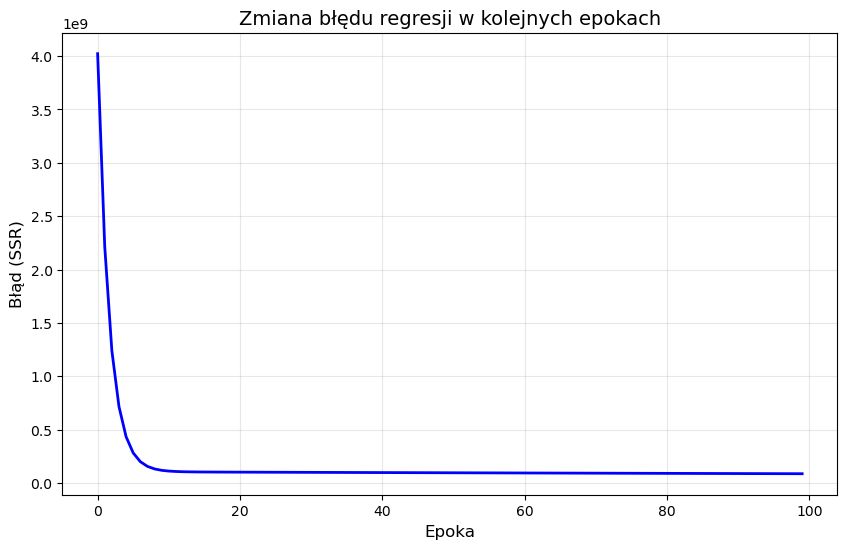

Początkowy błąd: 4021.80M
Końcowy błąd: 88.17M
Liczba epok: 100


In [246]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(error)), error, 'b-', linewidth=2)
plt.xlabel('Epoka', fontsize=12)
plt.ylabel('Błąd (SSR)', fontsize=12)
plt.title('Zmiana błędu regresji w kolejnych epokach', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Początkowy błąd: {error[0]/1e6:.2f}M")
print(f"Końcowy błąd: {error[-1]/1e6:.2f}M")
print(f"Liczba epok: {len(error)}")

### Zadanie 4

Do wykresu stworzonego w zadaniu 1 dodaj prostą regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

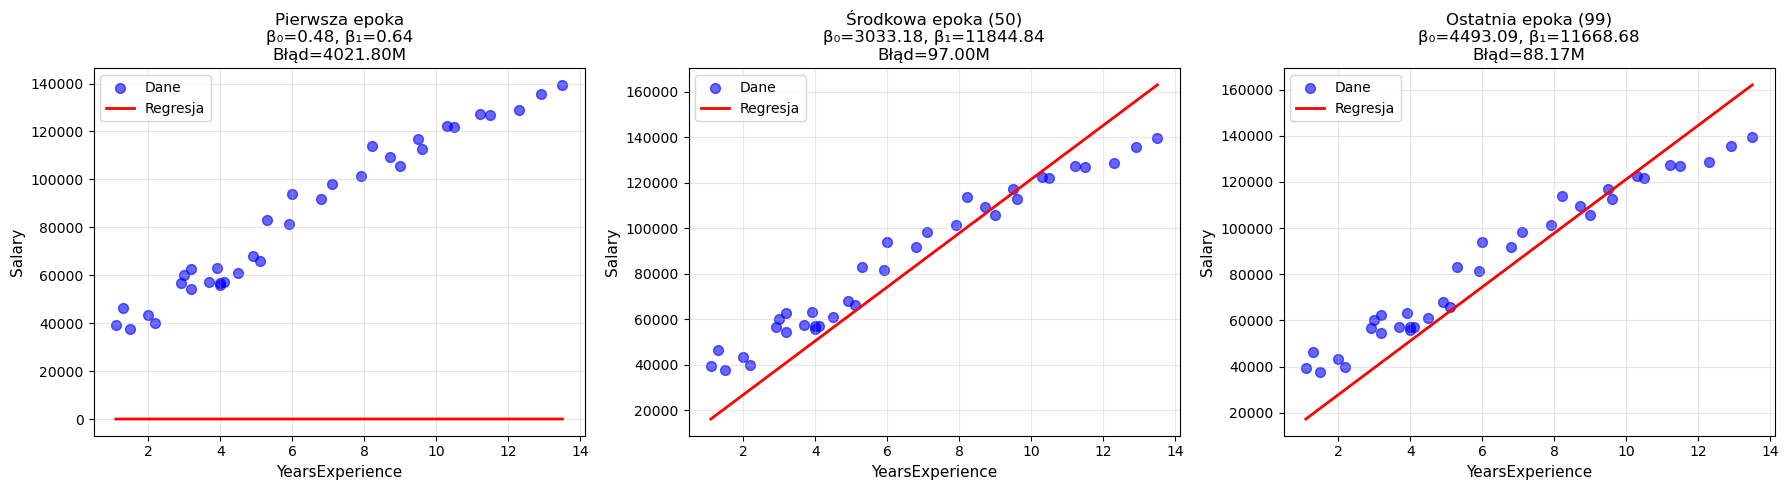

In [247]:
first_epoch = 0
middle_epoch = len(b0) // 2
last_epoch = len(b0) - 1

epochs_to_plot = [
    (first_epoch, 'Pierwsza epoka'),
    (middle_epoch, f'Środkowa epoka ({middle_epoch})'),
    (last_epoch, f'Ostatnia epoka ({last_epoch})')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (epoch, title) in enumerate(epochs_to_plot):
    ax = axes[idx]
    
    # Punkty danych
    ax.scatter(x, y, color='blue', alpha=0.6, s=50, label='Dane')
    
    # Prosta regresji dla danej epoki
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = b0[epoch] + b1[epoch] * x_line
    ax.plot(x_line, y_line, 'r-', linewidth=2, label='Regresja')
    
    # Formatowanie
    ax.set_xlabel('YearsExperience', fontsize=11)
    ax.set_ylabel('Salary', fontsize=11)
    ax.set_title(f'{title}\nβ₀={b0[epoch]:.2f}, β₁={b1[epoch]:.2f}\nBłąd={error[epoch]/1e6:.2f}M', 
                 fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Zadanie 5

Wybierz dowolnie trzy różne wartości współczynnika $\alpha$. Ile epok mu zostać użytych żeby otrzymać zamierzoną wartość błędu?

Alpha = 0.001:
  Liczba epok: 83
  Końcowy błąd: 104.1624M

Alpha = 0.005:
  Liczba epok: 834
  Końcowy błąd: 29.4250M

Alpha = 0.03:
  Liczba epok: 298
  Końcowy błąd: 18.3795M



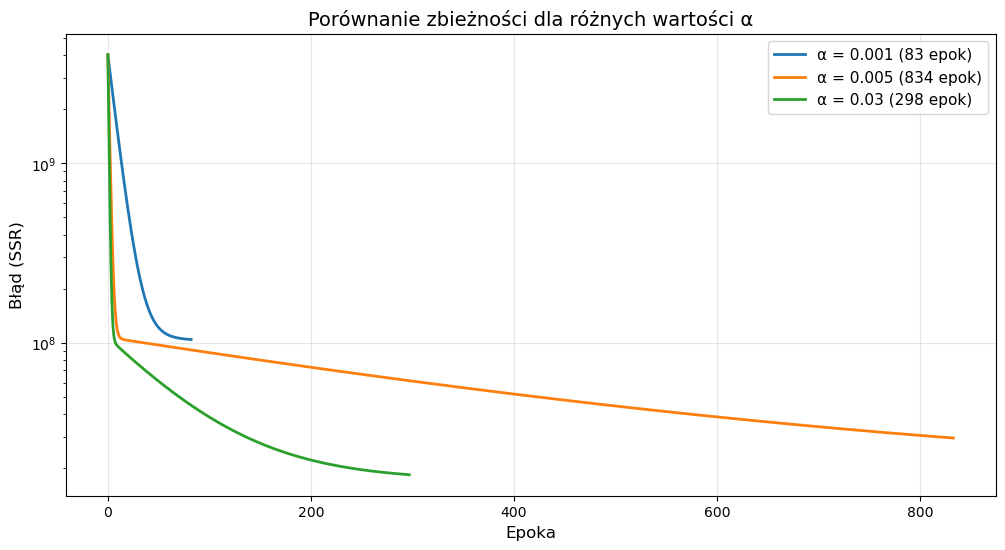

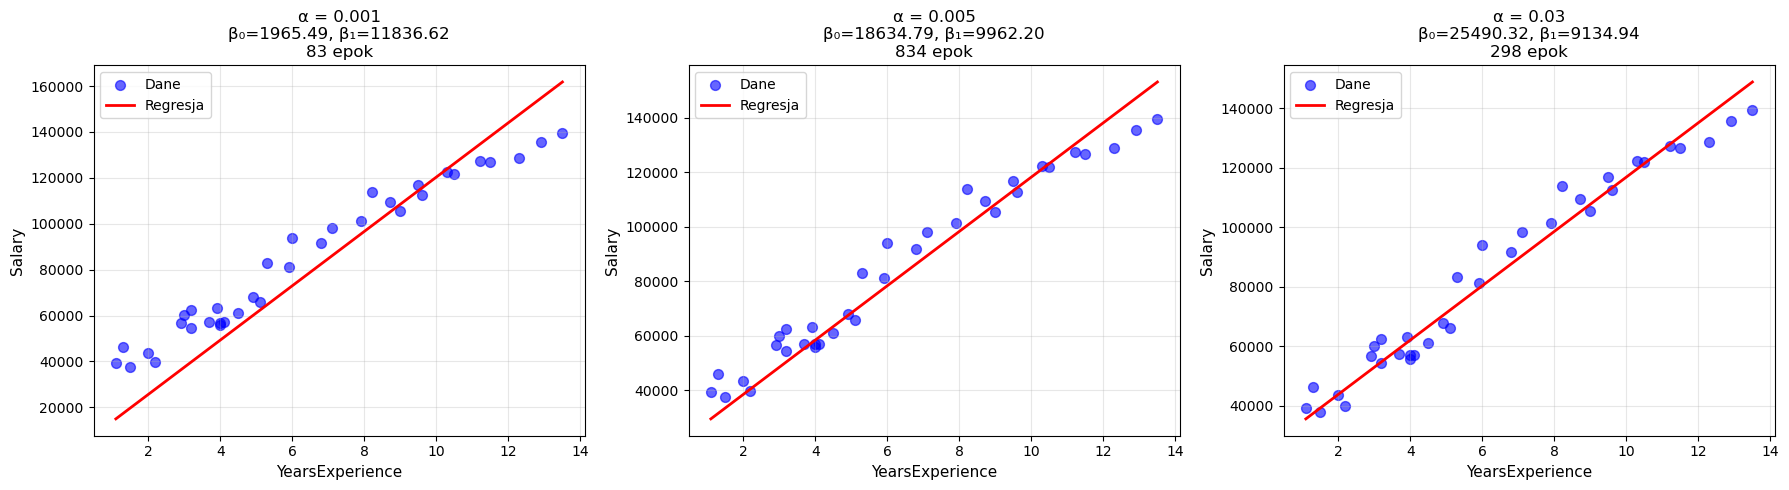

In [248]:
alphas = [0.001, 0.005, 0.03]
results = {}

for alpha_val in alphas:
    b0_hist, b1_hist, error_hist = learn_and_fit(x, y, alpha = alpha_val, epoch = 1000)
    results[alpha_val] = {
        'epochs': len(error_hist),
        'final_error': error_hist[-1],
        'errors': error_hist,
        'b0': b0_hist,
        'b1': b1_hist
    }
    print(f"Alpha = {alpha_val}:")
    print(f"  Liczba epok: {results[alpha_val]['epochs']}")
    print(f"  Końcowy błąd: {results[alpha_val]['final_error']/1e6:.4f}M")
    print()

plt.figure(figsize=(12, 6))

for alpha_val in alphas:
    errors = results[alpha_val]['errors']
    plt.plot(range(len(errors)), errors, linewidth=2, 
             label=f'α = {alpha_val} ({len(errors)} epok)')

plt.xlabel('Epoka', fontsize=12)
plt.ylabel('Błąd (SSR)', fontsize=12)
plt.title('Porównanie zbieżności dla różnych wartości α', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, alpha_val in enumerate(alphas):
    ax = axes[idx]
    
    ax.scatter(x, y, color='blue', alpha=0.6, s=50, label='Dane')
    
    final_b0 = results[alpha_val]['b0'][-1]
    final_b1 = results[alpha_val]['b1'][-1]
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = final_b0 + final_b1 * x_line
    ax.plot(x_line, y_line, 'r-', linewidth=2, label='Regresja')
    
    ax.set_xlabel('YearsExperience', fontsize=11)
    ax.set_ylabel('Salary', fontsize=11)
    ax.set_title(f'α = {alpha_val}\nβ₀={final_b0:.2f}, β₁={final_b1:.2f}\n'
                 f'{results[alpha_val]["epochs"]} epok', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Uwaga do współczynnika alpha

Współczynnik alpha musi być bardzo niski ze wzgledu na brak normalizacji zmiennej objaśnianej i objaśniającej. Zmienna objaśniana (zarobki) przyjmuje wysokie wartości rzędu kilkudziesięciu do kilkuset tysięcy, podczas gdy zmienna objaśniająca (lata doświadczenia) przyjmuje wartości od kilku do kilkunastu. Gradienty mają wartości zbliżone do rzędu zmiennej objaśnianej, przez co współczynnik alpha rzędu 0.5 powoduje wysokie przeskoki współczynników beta i jego rozbieżność - przykład poniżej.

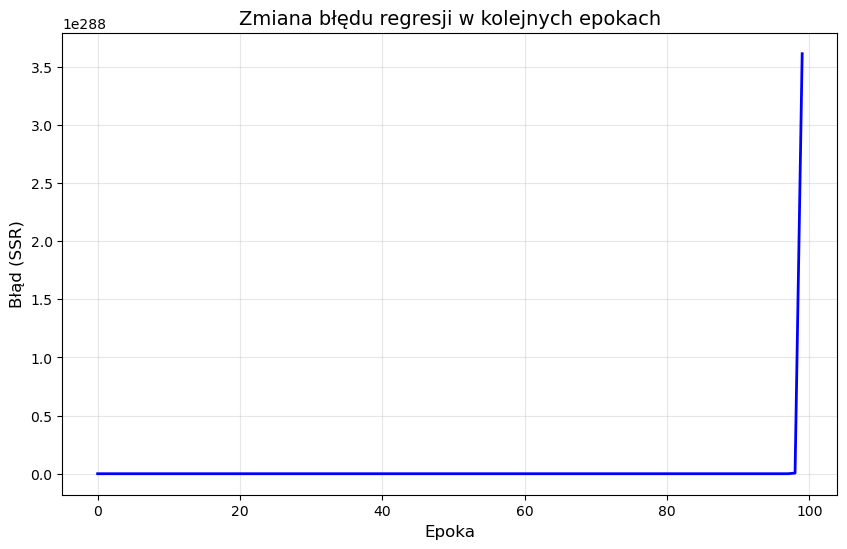

Początkowy błąd: 4021.91M
Końcowy błąd: 3611653066289892705400403256776840279951921066228385368906099038071244512271015315754984525203128343988247431343953681149168378536289095467065955297673900887863343316527617704370867052559444567619252803636043925825064323851278934600410861359812228853636411345760310634588044865306624.00M
Liczba epok: 100


In [249]:
b0, b1, error = learn_and_fit(x, y, alpha=0.5)

plt.figure(figsize=(10, 6))
plt.plot(range(len(error)), error, 'b-', linewidth=2)
plt.xlabel('Epoka', fontsize=12)
plt.ylabel('Błąd (SSR)', fontsize=12)
plt.title('Zmiana błędu regresji w kolejnych epokach', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Początkowy błąd: {error[0]/1e6:.2f}M")
print(f"Końcowy błąd: {error[-1]/1e6:.2f}M")
print(f"Liczba epok: {len(error)}")

### Testy jednostkowe

In [252]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('./Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, error = learn_and_fit(x, y, alpha=0.001)
        
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_alpha_validation (__main__.CoefficientInitializationTest.test_alpha_validation)
Test walidacji parametru alpha ... ok
test_coefficients_in_range (__main__.CoefficientInitializationTest.test_coefficients_in_range) ... ok
test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.021s

OK


### Zadanie 6

Stwórz test jednostkowy sprawdzający czy funkcja inicjalizująca współczynniki regresji zwraca wartości z przedziału (0, 1)

In [253]:
class CoefficientInitializationTest(unittest.TestCase):
    
    def test_coefficients_in_range(self):
        for _ in range(100):
            alpha, beta0, beta1 = initialize_coefficients()
            
            self.assertGreater(alpha, 0, "Alpha powinno być większe od 0")
            self.assertLess(alpha, 1, "Alpha powinno być mniejsze od 1")
            self.assertGreaterEqual(beta0, 0, "Beta0 powinno być >= 0")
            self.assertLessEqual(beta0, 1, "Beta0 powinno być <= 1")
            self.assertGreaterEqual(beta1, 0, "Beta1 powinno być >= 0")
            self.assertLessEqual(beta1, 1, "Beta1 powinno być <= 1")
    
    def test_alpha_validation(self):
        """Test walidacji parametru alpha"""
        with self.assertRaises(ValueError):
            initialize_coefficients(-0.1)
        
        with self.assertRaises(ValueError):
            initialize_coefficients(1.5)
        
        try:
            initialize_coefficients(0)
            initialize_coefficients(1)
        except ValueError:
            self.fail("Wartości graniczne 0 i 1 powinny być dozwolone")

unittest.main(argv=[''], verbosity=2, exit=False)

test_alpha_validation (__main__.CoefficientInitializationTest.test_alpha_validation)
Test walidacji parametru alpha ... ok
test_coefficients_in_range (__main__.CoefficientInitializationTest.test_coefficients_in_range) ... ok
test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.017s

OK
